### Canny Border

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cargar la imagen en escala de grises
imagen = cv2.imread('lanus.png', cv2.IMREAD_GRAYSCALE)



1- Suavizamiento y Diferenciación: Utilizamos cv2.GaussianBlur para reducir el ruido en la imagen. El tamaño del filtro y el valor de sigma determinan cuán sensible es el proceso al ruido.

2- Cálculo de la Dirección Perpendicular al Borde: Las derivadas Ix e Iy se obtienen usando el operador Sobel (cv2.Sobel). Luego, calculamos la magnitud del borde combinando estas derivadas con cv2.magnitude.

3- Cálculo del Ángulo del Gradiente: Utilizamos cv2.phase para calcular el ángulo del gradiente en cada píxel. Este ángulo indica la dirección perpendicular al borde en grados.

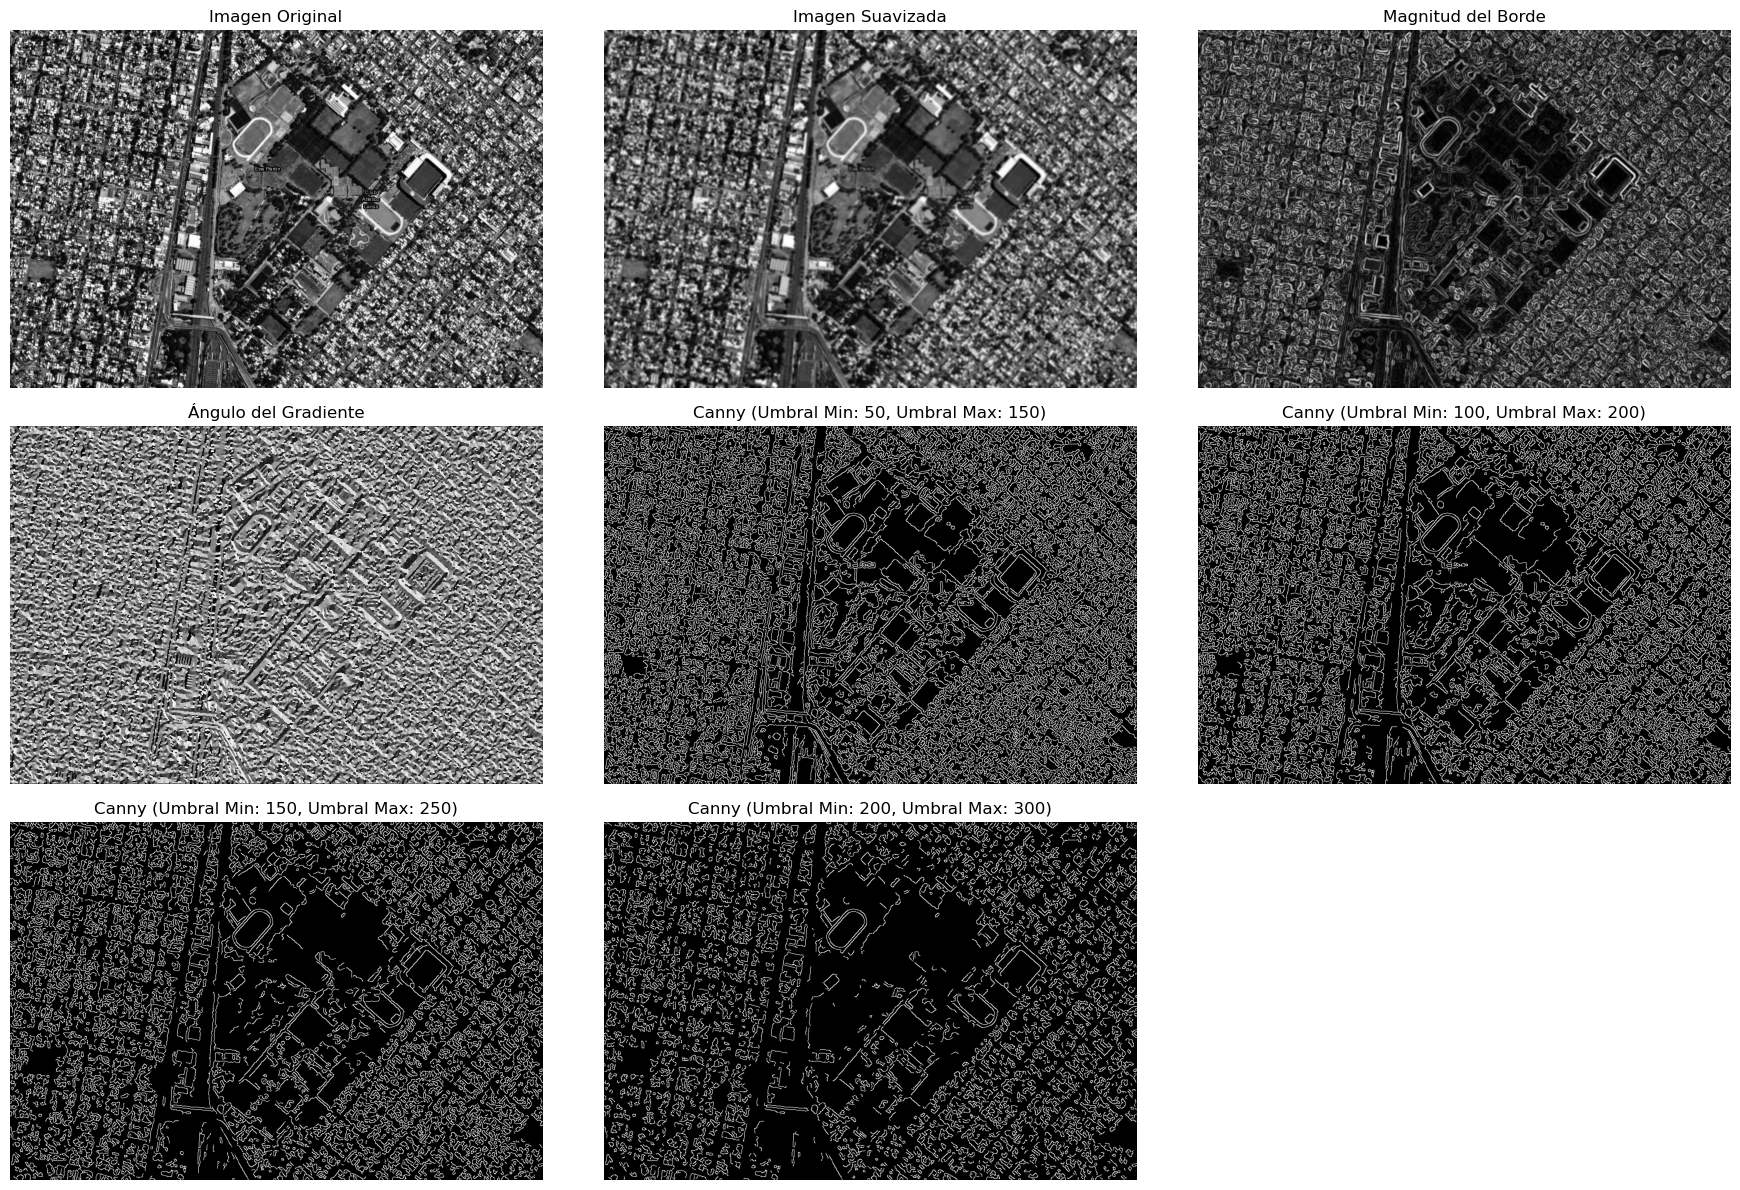

In [11]:
# Paso 1: Suavizamiento con filtro Gaussiano
tamano_filtro = 5
sigma = 1.4
imagen_suavizada = cv2.GaussianBlur(imagen, (tamano_filtro, tamano_filtro), sigma)

# Paso 2: Calcular las derivadas Ix e Iy usando el operador de Sobel
gradiente_x = cv2.Sobel(imagen_suavizada, cv2.CV_64F, 1, 0, ksize=3)
gradiente_y = cv2.Sobel(imagen_suavizada, cv2.CV_64F, 0, 1, ksize=3)

# Magnitud del borde (magnitud del gradiente)
magnitud_borde = cv2.magnitude(gradiente_x, gradiente_y)

# Paso 3: Calcular el ángulo del gradiente
angulo_gradiente = cv2.phase(gradiente_x, gradiente_y, angleInDegrees=True)

# Definir diferentes conjuntos de parámetros para el detector de Canny
parametros_canny = [
    (50, 150),  # Umbral bajo = 50, Umbral alto = 150
    (100, 200),  # Umbral bajo = 100, Umbral alto = 200
    (150, 250),  # Umbral bajo = 150, Umbral alto = 250
    (200, 300),  # Umbral bajo = 200, Umbral alto = 300
]

# Crear una figura para mostrar los resultados
plt.figure(figsize=(18, 12))

# Mostrar los pasos intermedios
plt.subplot(3, 3, 1)
plt.title("Imagen Original")
plt.imshow(imagen, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title("Imagen Suavizada")
plt.imshow(imagen_suavizada, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title("Magnitud del Borde")
plt.imshow(magnitud_borde, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.title("Ángulo del Gradiente")
plt.imshow(angulo_gradiente, cmap='gray')
plt.axis('off')

# Aplicar el detector de Canny con diferentes parámetros y mostrar los resultados
for i, (umbral_min, umbral_max) in enumerate(parametros_canny):
    # Aplicar el detector de Canny con los umbrales específicos
    bordes = cv2.Canny(imagen_suavizada, umbral_min, umbral_max)

    # Mostrar el resultado
    plt.subplot(3, 3, i + 5)
    plt.title(f'Canny (Umbral Min: {umbral_min}, Umbral Max: {umbral_max})')
    plt.imshow(bordes, cmap='gray')
    plt.axis('off')

# Mostrar todos los resultados juntos
plt.tight_layout()
plt.show()




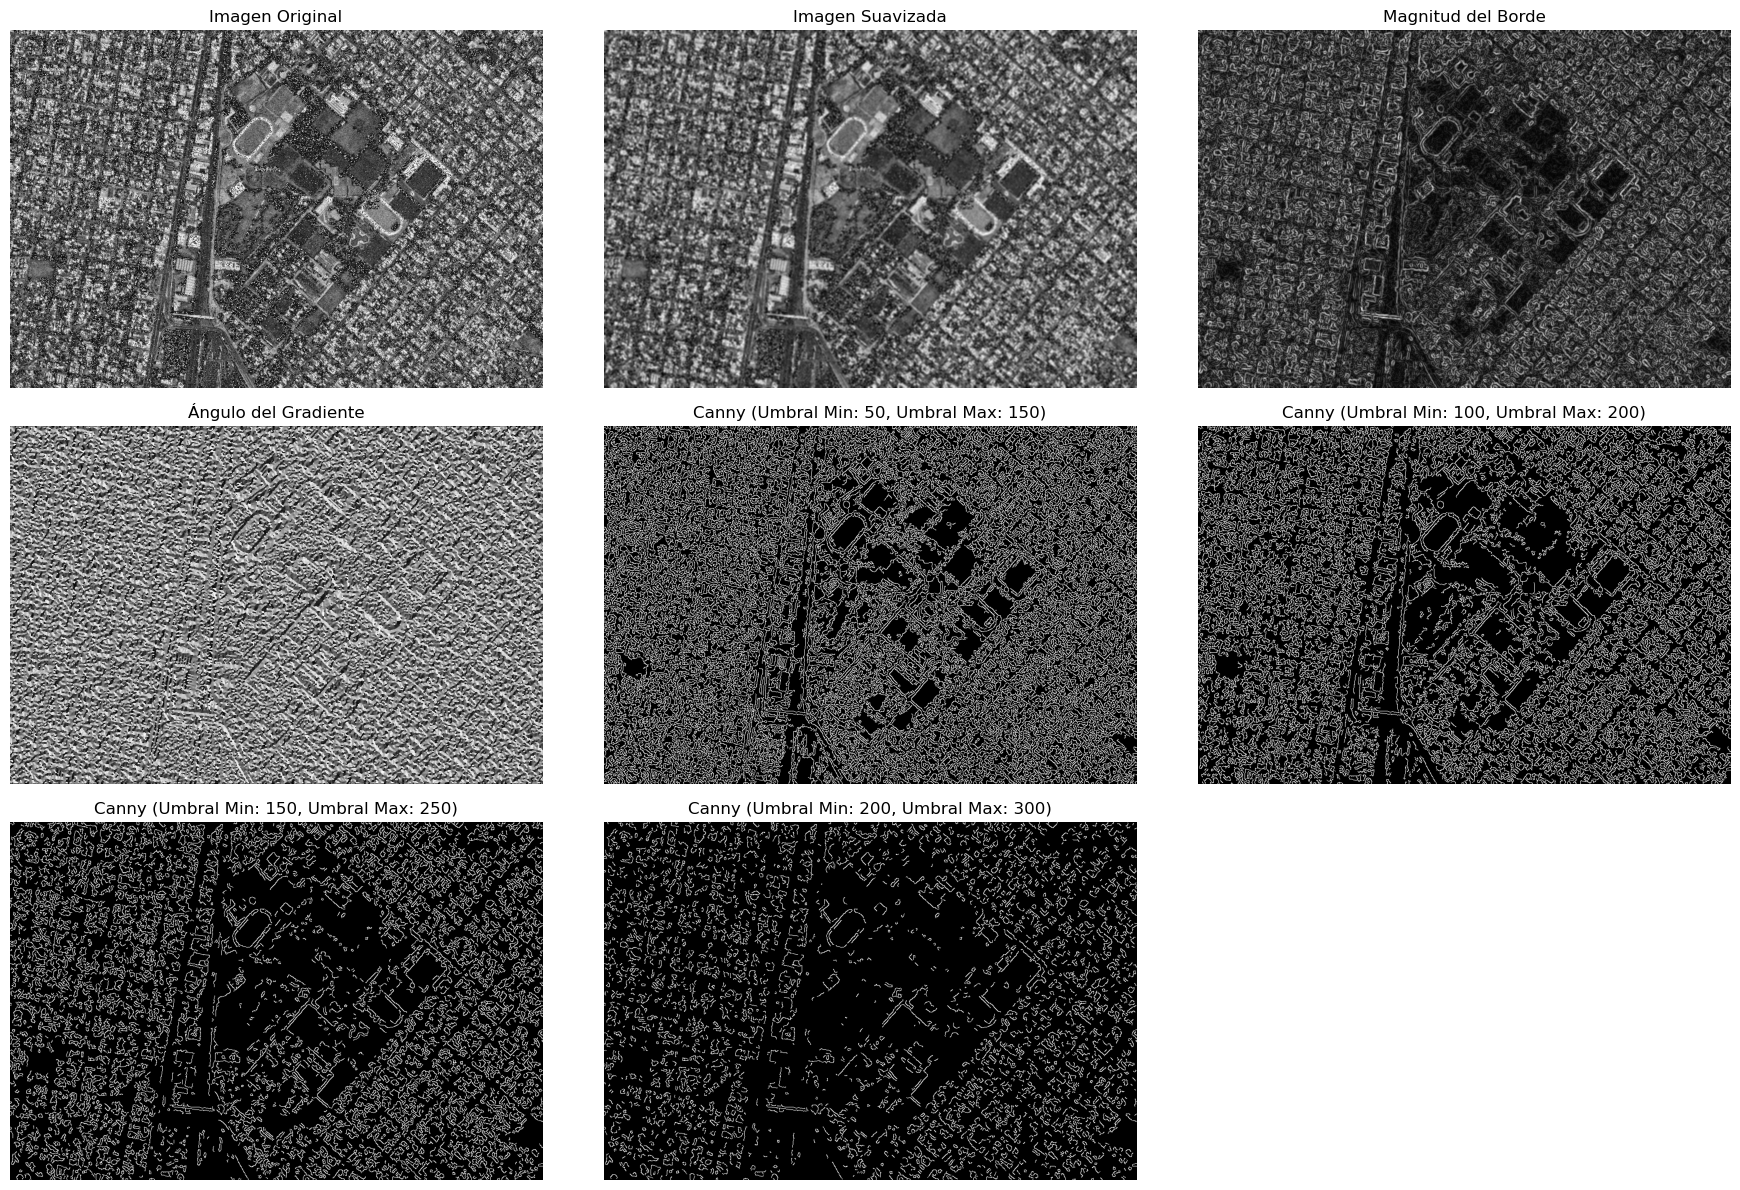

In [12]:
def add_gaussian_noise(image, mean, stddev, contamination_percentage):
    # Genera ruido gaussiano
    gaussian_noise = np.random.normal(mean, stddev, image.shape)

    # Calcula la máscara de contaminación
    mask = np.random.rand(*image.shape) < (contamination_percentage / 100)

    # Agrega el ruido a la imagen solo en los puntos especificados por la máscara
    noisy_image = np.copy(image)
    noisy_image[mask] = image[mask] + gaussian_noise[mask]

    # Asegura que los valores se mantengan en el rango [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image


# Aplicar el ruido gaussiano a la imagen en escala de grises
imagen_ruido_gaussiano = add_gaussian_noise(imagen, 0, 25, 70)

# Paso 1: Suavizamiento con filtro Gaussiano
tamano_filtro = 5
sigma = 1.4
imagen_suavizada = cv2.GaussianBlur(imagen_ruido_gaussiano, (tamano_filtro, tamano_filtro), sigma)

# Paso 2: Calcular las derivadas Ix e Iy usando el operador de Sobel
gradiente_x = cv2.Sobel(imagen_suavizada, cv2.CV_64F, 1, 0, ksize=3)
gradiente_y = cv2.Sobel(imagen_suavizada, cv2.CV_64F, 0, 1, ksize=3)

# Magnitud del borde (magnitud del gradiente)
magnitud_borde = cv2.magnitude(gradiente_x, gradiente_y)

# Paso 3: Calcular el ángulo del gradiente
angulo_gradiente = cv2.phase(gradiente_x, gradiente_y, angleInDegrees=True)

# Definir diferentes conjuntos de parámetros para el detector de Canny
parametros_canny = [
    (50, 150),  # Umbral bajo = 50, Umbral alto = 150
    (100, 200),  # Umbral bajo = 100, Umbral alto = 200
    (150, 250),  # Umbral bajo = 150, Umbral alto = 250
    (200, 300),  # Umbral bajo = 200, Umbral alto = 300
]

# Crear una figura para mostrar los resultados
plt.figure(figsize=(18, 12))

# Mostrar los pasos intermedios
plt.subplot(3, 3, 1)
plt.title("Imagen Original")
plt.imshow(imagen_ruido_gaussiano, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title("Imagen Suavizada")
plt.imshow(imagen_suavizada, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title("Magnitud del Borde")
plt.imshow(magnitud_borde, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.title("Ángulo del Gradiente")
plt.imshow(angulo_gradiente, cmap='gray')
plt.axis('off')

# Aplicar el detector de Canny con diferentes parámetros y mostrar los resultados
for i, (umbral_min, umbral_max) in enumerate(parametros_canny):
    # Aplicar el detector de Canny con los umbrales específicos
    bordes = cv2.Canny(imagen_suavizada, umbral_min, umbral_max)

    # Mostrar el resultado
    plt.subplot(3, 3, i + 5)
    plt.title(f'Canny (Umbral Min: {umbral_min}, Umbral Max: {umbral_max})')
    plt.imshow(bordes, cmap='gray')
    plt.axis('off')

# Mostrar todos los resultados juntos
plt.tight_layout()
plt.show()


### Conclusiones
##### 1- **Umbrales bajos (50, 150)**: Con el ruido, este umbral detecta muchos bordes, incluyendo aquellos introducidos por el ruido. Esto hace que el resultado sea más caótico y menos preciso que el que devuelve cuando se aplica a la imagen original sin ruidos.

##### 2- **Umbrales medios (100, 200)**: Proporciona una mejor selección de bordes, reduciendo algunos efectos del ruido, pero aún mantiene más bordes adicionales o no deseados en comparación con la imagen original sin ruido.

##### 3- **Umbrales altos (150, 250 y 200, 300)**: Filtra más bordes débiles y se enfoca en los más fuertes, pero se ve que algunos bordes importantes pueden llegar a perderse perderse debido al impacto del ruido, a diferencia de la cuando no se veía afectado por el ruido Gaussiano.